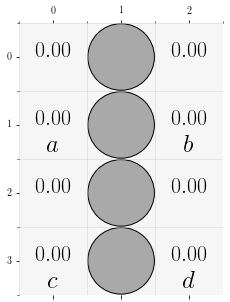

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 

shape = n_rows, n_cols = (4,3)

structure = np.array([
['E','B','E'],
['E','B','E'],
['E','B','E'],
['E','B','E'],
['E','E','E']
])

label = np.empty(shape,dtype=object)
label.fill(())
label[1,0] = ('a',)
label[1,2] = ('b',)
label[3,0] = ('c',)
label[3,2] = ('d',)

label1 = np.empty(shape,dtype=object)
label1.fill(())
# label1[1,0] = ('a',)
label1[1,2] = ('b',)
# label1[3,0] = ('c',)
label1[3,2] = ('d',)

label2 = np.empty(shape,dtype=object)
label2.fill(())
label2[1,0] = ('a',)
# label1[1,2] = ('b',)
label2[3,0] = ('c',)
# label1[3,2] = ('d',)

    
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,figsize=5, p=0.8)
grid_mdp.plot()

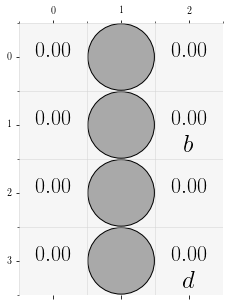

In [47]:
grid_mdp2 = GridMDP(shape=shape,structure=structure,label=label1,figsize=5,p=1.0)
grid_mdp2.plot()

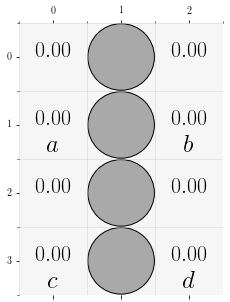

In [48]:
comb_mdp = GridMDP(shape=shape,structure=structure,label=label,figsize=5, p=1)
comb_mdp.plot()

In [2]:
from csrl.oa import OmegaAutomaton

# LTL Specification
ltl1 = 'F(a U b) & F(b & a) & (!c U a) & (FG c) '
ltl2 = '(!d U b) & F(b & a) & F(b U a) & (FG d)' # LTL seems to have to contain all labels for MDP

# Translate the LTL formula to an LDBA
oa1 = OmegaAutomaton(ltl1, extra_aps=grid_mdp.all_labels)
oa2 = OmegaAutomaton(ltl2,  extra_aps=grid_mdp.all_labels)

print('Number of Omega-automaton states (including the trap state):',oa1.shape[1])
print('Number of Omega-automaton states (including the trap state):',oa2.shape[1])


['State: 1', '[t] 1', '2', 'State: 3', '[!0 & !2] 3', '[0 & !1] 4', '[0 & 1] 1', 'State: 4', '[0 & !1 | !0] 4', '[0 & 1] 1', 'State: 0', '[!0 & !1 & !2] 0', '[0 & !1] 5', '[!0 & 1 & !2] 3', '[0 & 1] 1', 'State: 5', '[!1] 5', '[!0 & 1] 4', '[0 & 1] 1', 'State: 2', '[2] 2 {0}']
[t] 1
[None]
set()
---  () -  True -  set()  -  set()
here 1 [None]
---  ('a',) -  True -  set()  -  set()
here 1 [None]
---  ('b',) -  True -  set()  -  set()
here 1 [None]
---  ('c',) -  True -  set()  -  set()
here 1 [None]
---  ('d',) -  True -  set()  -  set()
here 1 [None]
---  ('a', 'b') -  True -  set()  -  set()
here 1 [None]
---  ('a', 'c') -  True -  set()  -  set()
here 1 [None]
---  ('a', 'd') -  True -  set()  -  set()
here 1 [None]
---  ('b', 'c') -  True -  set()  -  set()
here 1 [None]
---  ('b', 'd') -  True -  set()  -  set()
here 1 [None]
---  ('c', 'd') -  True -  set()  -  set()
here 1 [None]
---  ('a', 'b', 'c') -  True -  set()  -  set()
here 1 [None]
---  ('a', 'b', 'd') -  True -  set()  

In [3]:
display(oa1)

In [4]:
display(oa2)

In [135]:
from csrl import ControlSynthesis
import numpy as np 

# Construct product MDPs
csrl1 = ControlSynthesis(grid_mdp,oa1)

csrl2 = ControlSynthesis(grid_mdp,oa2) 

In [136]:
from multi import MultiControlSynthesis

mcsrl = MultiControlSynthesis([csrl1,csrl2], mdp=grid_mdp)
mcsrl.shape

(2, 1, 7, 4, 3, 11)

In [137]:
grid_mdp.all_labels

[('a',), ('b',), ('c',), ('d',)]

#### TODO: Problem when adding all labels, states space mismatch. 

In [153]:
qval = mcsrl.combined_qlearning(T=100, K=1000)

In [154]:
# LTL Specification
#ltl2 = '((Fb & !d) U a) & F c & FG d'
display (oa2)
mcsrl.plot(1)
#for i in range(1):
    #mcsrl.plot(i)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=6), …

In [155]:
#ltl1 = '(!a U b) & F d & FG c'
display(oa1)
mcsrl.plot(0)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=6), …

In [142]:
print(np.max(mcsrl.Q[0], axis=4))

[[[[0.99995969 0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.99996    0.         0.        ]
   [0.99997    0.         0.        ]
   [0.99998    0.         0.        ]
   [0.99999    0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [1.         0.         0.        ]]

  [[0.99995995 0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.99994892 0.         0.        ]
   [0.99995946 0.         0.        ]
   [0.99995273 0.         0.        ]
   [0.9999413  0.         0.        ]]

  [[0.99995005 0.         0.        ]
   [0.9999574  0.         0.        ]
   [0.99995366 0.         0.        ]
   [0.9999445  0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]


In [143]:
np.argmax(qval[0],axis=4)

array([[[[1, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         [6, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [1, 0, 0]],

        [[1, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[1, 0, 0],
         [3, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[1, 0, 0],
         [2, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]])

In [144]:
print(np.max(mcsrl.Q[1], axis=4))

[[[[0.         0.         0.99995951]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.99995215]
   [0.         0.         0.99995971]
   [0.         0.         0.99995133]
   [0.         0.         0.99994069]]

  [[0.         0.         0.99995652]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.99996   ]
   [0.         0.         0.99997   ]
   [0.         0.         0.99998   ]
   [0.         0.         0.99999   ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         1.        ]]

  [[0.         0.         0.99995126]
   [0.         0.         0.99994405]
   [0.         0.         0.99995452]
   [0.         0.         0.99994284]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]


In [158]:
policies = [np.argmax(qval[0],axis=4), np.argmax(qval[1],axis=4)]
mcsrl.simulate(agents = mcsrl.agent_control, policy =policies, T= 20, mdp2 =grid_mdp, animation="sharedltl")

20
e [[(0, 0, 0, 0), (0, 0, 0, 2)]]
0 :  (0, 0, 0) 	 (0, 0, 2)
1 :  (1, 1, 0) 	 (3, 1, 2)
2 :  (1, 2, 0) 	 (3, 2, 2)
3 :  (1, 3, 0) 	 (3, 3, 2)
4 :  (2, 3, 0) 	 (4, 3, 2)
5 :  (2, 3, 0) 	 (4, 3, 2)
6 :  (2, 3, 0) 	 (4, 3, 2)
7 :  (2, 3, 0) 	 (4, 3, 2)
8 :  (2, 3, 0) 	 (4, 3, 2)
9 :  (2, 3, 0) 	 (4, 3, 2)
10 :  (2, 3, 0) 	 (4, 3, 2)
11 :  (2, 3, 0) 	 (4, 3, 2)
12 :  (2, 3, 0) 	 (4, 3, 2)
13 :  (2, 3, 0) 	 (4, 3, 2)
14 :  (2, 3, 0) 	 (4, 3, 2)
15 :  (2, 3, 0) 	 (4, 3, 2)
16 :  (2, 3, 0) 	 (4, 3, 2)
17 :  (2, 3, 0) 	 (4, 3, 2)
18 :  (2, 3, 0) 	 (4, 3, 2)
19 :  (2, 3, 0) 	 (4, 3, 2)


[[(0, 0, 0, 0), (0, 0, 0, 2)],
 [(0, 1, 1, 0), (0, 3, 1, 2)],
 [(0, 1, 2, 0), (0, 3, 2, 2)],
 [(0, 1, 3, 0), (0, 3, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)],
 [(0, 2, 3, 0), (0, 4, 3, 2)]]